<a href="https://colab.research.google.com/github/abhi333-lang/Covida/blob/main/resnet_trained_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pathlib
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as npimg
import random
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joker1234567","key":"b4f1f6ecb7fd547c00e2d727beb020c4"}'}

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d prashant268/chest-xray-covid19-pneumonia

 99% 2.03G/2.06G [00:14<00:00, 115MB/s]
100% 2.06G/2.06G [00:14<00:00, 150MB/s]


In [ ]:
!unzip ./*zip

Streaming output truncated to the last 5000 lines.
  inflating: Data/train/COVID19/COVID19(228).jpg  
  inflating: Data/train/COVID19/COVID19(229).jpg  
  inflating: Data/train/COVID19/COVID19(23).jpg  
  inflating: Data/train/COVID19/COVID19(230).jpg  
  inflating: Data/train/COVID19/COVID19(231).jpg  
  inflating: Data/train/COVID19/COVID19(232).jpg  
  inflating: Data/train/COVID19/COVID19(233).jpg  
  inflating: Data/train/COVID19/COVID19(234).jpg  
  inflating: Data/train/COVID19/COVID19(235).jpg  
  inflating: Data/train/COVID19/COVID19(236).jpg  
  inflating: Data/train/COVID19/COVID19(237).jpg  
  inflating: Data/train/COVID19/COVID19(238).jpg  
  inflating: Data/train/COVID19/COVID19(239).jpg  
  inflating: Data/train/COVID19/COVID19(24).jpg  
  inflating: Data/train/COVID19/COVID19(240).jpg  
  inflating: Data/train/COVID19/COVID19(241).jpg  
  inflating: Data/train/COVID19/COVID19(242).jpg  
  inflating: Data/train/COVID19/COVID19(243).jpg  
  inflating: Data/train/COVID19/C

In [ ]:
for dirpath, dirname, filename in os.walk('./Data'):
  print(f"There are {len(dirname)} directory and {len(filename)} images in {dirpath}")

There are 2 directory and 0 images in ./Data
There are 3 directory and 0 images in ./Data/train
There are 0 directory and 3418 images in ./Data/train/PNEUMONIA
There are 0 directory and 1266 images in ./Data/train/NORMAL
There are 0 directory and 460 images in ./Data/train/COVID19
There are 3 directory and 0 images in ./Data/test
There are 0 directory and 855 images in ./Data/test/PNEUMONIA
There are 0 directory and 317 images in ./Data/test/NORMAL
There are 0 directory and 116 images in ./Data/test/COVID19


In [ ]:
sub_dir = pathlib.Path("./Data/test")
[item.name for item in sub_dir.glob('*')]

['PNEUMONIA', 'NORMAL', 'COVID19']

In [ ]:
img = cv2.imread('./Data/train/COVID19/COVID19(0).jpg')
dimensions = img.shape
#using the indices 0, 1 and 2 in shape function to get the height, width and number of channels in the image
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
#displaying the dimensions of the image as the output on the screen
print('The dimension of the input image is : ', dimensions)
print('The height of the input image is : ', height)
print('The width of the input image is : ', width)
print('The Number of Channels in the input image are : ', channels)

The dimension of the input image is :  (2000, 2000, 3)
The height of the input image is :  2000
The width of the input image is :  2000
The Number of Channels in the input image are :  3


In [ ]:
print("Type:",type(img))
print('Total Number of pixels:', img.size)
print("Image data type:", img.dtype)





Type: <class 'numpy.ndarray'>
Total Number of pixels: 12000000
Image data type: uint8


In [ ]:
def random_image(targed_class, target_path):
  target_folder = target_path+target_class
  sample = random.sample(os.listdir(target_folder),1)
  return sample


In [ ]:
target_path = './Data/train/'
target_class = 'PNEUMONIA'

random_image(target_class,target_path)

['PNEUMONIA(1129).jpg']

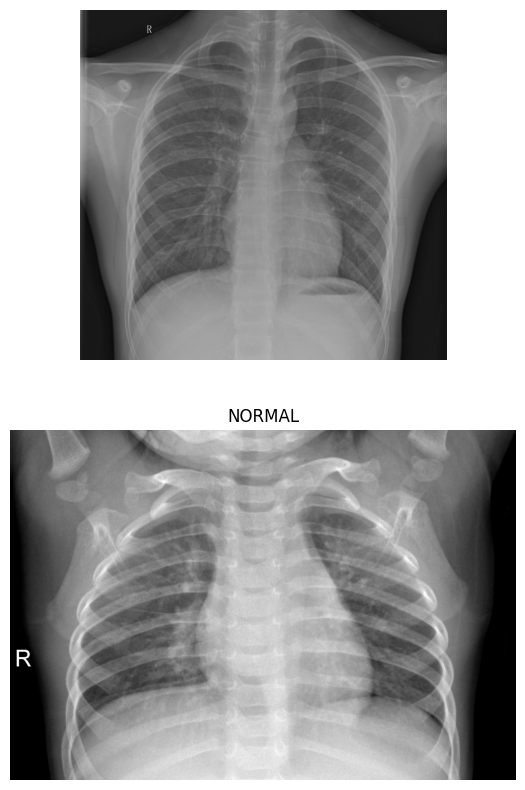

In [ ]:
target_path = './Data/train/'
target_class = 'NORMAL'
target_folder = target_path + target_class

fig,ax = plt.subplots(2,figsize= (10,10))
for i in range(2):
  sample = random_image(target_class,target_path)
  img = npimg.imread(target_folder+'/'+sample[0])
  ax[i].imshow(img,cmap='gray')
  plt.title(target_class)
  ax[i].axis('off')

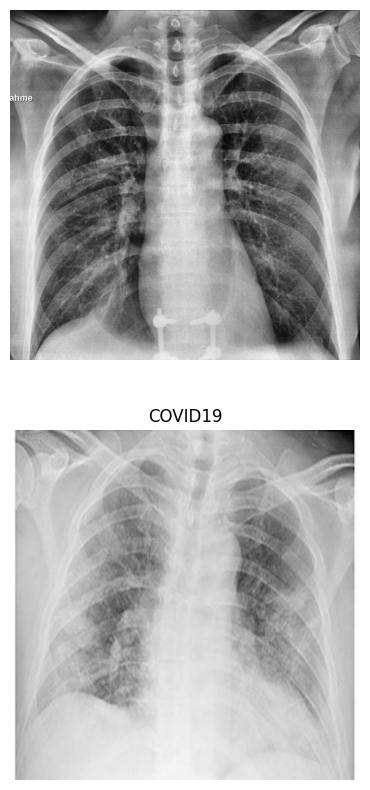

In [ ]:
target_path = './Data/train/'
target_class = 'COVID19'
target_folder = target_path + target_class

fig,ax = plt.subplots(2,figsize= (10,10))
for i in range(2):
  sample = random_image(target_class,target_path)
  img = npimg.imread(target_folder+'/'+sample[0])
  ax[i].imshow(img,cmap='gray')
  plt.title(target_class)
  ax[i].axis('off')

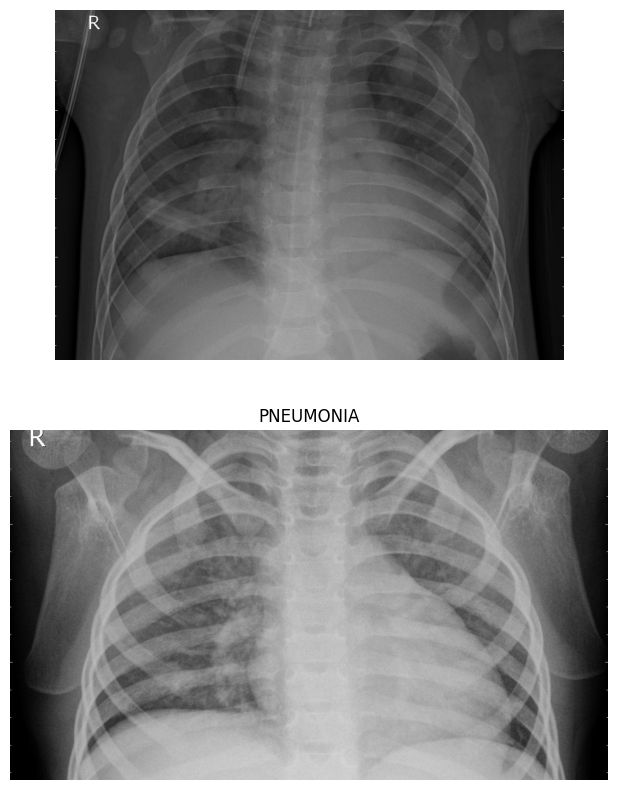

In [ ]:
target_path = './Data/train/'
target_class = 'PNEUMONIA'
target_folder = target_path + target_class

fig,ax = plt.subplots(2,figsize= (10,10))
for i in range(2):
  sample = random_image(target_class,target_path)
  img = npimg.imread(target_folder+'/'+sample[0])
  ax[i].imshow(img,cmap='gray')
  plt.title(target_class)
  ax[i].axis('off')

Normal Image


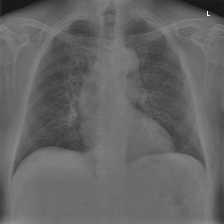

Median Blurred Image


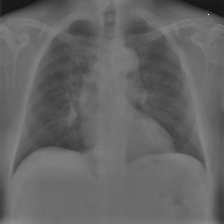

-1

In [ ]:
from google.colab.patches import cv2_imshow
dis = os.listdir('./Data/train/COVID19')
path = './Data/train/COVID19/'
img = dis[0]
read_img = cv2.imread(path+img)
read_img = cv2.resize(read_img,(224,224))
print("Normal Image")
cv2_imshow(read_img)
gimg = cv2.medianBlur(src=read_img,ksize = 3)
gimg = cv2.resize(gimg,(224,224))
print("Median Blurred Image")
cv2_imshow(gimg)
cv2.waitKey(0)

Normal Image


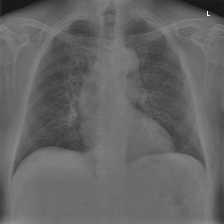

Gaussian Blurred Image


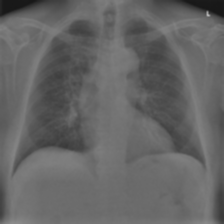

-1

In [ ]:
from google.colab.patches import cv2_imshow
dis = os.listdir('./Data/train/COVID19')
path = './Data/train/COVID19/'
img = dis[0]
read_img = cv2.imread(path+img)
read_img = cv2.resize(read_img,(224,224))
print("Normal Image")
cv2_imshow(read_img)
gimg = cv2.GaussianBlur(read_img, (3, 3), 0)
gimg = cv2.resize(gimg,(224,224))
print("Gaussian Blurred Image")
cv2_imshow(gimg)
cv2.waitKey(0)

Normal Image


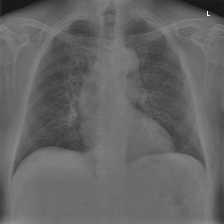

Bilaterally Filtered Image


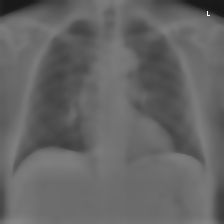

-1

In [ ]:
from google.colab.patches import cv2_imshow
dis = os.listdir('./Data/train/COVID19')
path = './Data/train/COVID19/'
img = dis[0]
read_img = cv2.imread(path+img)
read_img = cv2.resize(read_img,(224,224))
print("Normal Image")
cv2_imshow(read_img)
gimg = cv2.bilateralFilter(read_img, 9, 75, 75)
gimg = cv2.resize(gimg,(224,224))
print("Bilaterally Filtered Image")
cv2_imshow(gimg)
cv2.waitKey(0)

In [ ]:
data = []
labels = []
dis = os.listdir('./Data/train')
path = './Data/train/'
for i in dis:
      images = os.listdir(path+i)

      for img in images:

        read_img = cv2.imread(path+i+'/'+img)

        read_img = cv2.cvtColor(read_img,cv2.COLOR_BGR2RGB)

        read_img = cv2.GaussianBlur(read_img,(3,3),cv2.BORDER_DEFAULT)

        read_img = cv2.resize(read_img , (224,224))

        data.append(read_img)
        labels.append(counter)



In [ ]:
model = Sequential()
# Block 1
model.add(Conv2D(input_shape = (224,224,3), filters = 32, padding='same', kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=32, padding='same', kernel_size=(3,3)))
model.add(Activation('relu'))


model.add(MaxPool2D((2,2)))

#Block 2
model.add(Conv2D(filters=64,padding='same',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(filters=64,padding='same',kernel_size=(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))

#Block 3
model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(filters=128,padding='same',kernel_size=(3,3)))
model.add(Activation('relu'))

model.add(MaxPool2D((2,2)))
model.add(MaxPool2D((2,2)))

#Full Connected Layers
model.add(Flatten())
model.add(Dense(512,activation='relu'))

model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss="sparse_categorical_crossentropy",metrics=['accuracy'])

NameError: ignored

In [ ]:
#Normalizing the images
X_train = np.array(data)/255
y_train = np.array(labels)

In [ ]:

X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.33,random_state=42)
y_train = tf.keras.utils.to_categorical(y_train,num_classes=3)
y_test = tf.keras.utils.to_categorical(y_test,num_classes=3)

NameError: ignored

In [ ]:
model.summary()

NameError: ignored

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=30, batch_size=32)

Epoch 1/30
21/21 [==============================] - 29s 442ms/step - loss: 1.8756 - accuracy: 0.4814 - val_loss: 1.0986 - val_accuracy: 0.3309
Epoch 2/30
21/21 [==============================] - 3s 157ms/step - loss: 0.6779 - accuracy: 0.7059 - val_loss: 1.0969 - val_accuracy: 0.3309
Epoch 3/30
21/21 [==============================] - 3s 160ms/step - loss: 0.4528 - accuracy: 0.8127 - val_loss: 1.0838 - val_accuracy: 0.3669
Epoch 4/30
21/21 [==============================] - 3s 147ms/step - loss: 0.3261 - accuracy: 0.8684 - val_loss: 1.1147 - val_accuracy: 0.3309
Epoch 5/30
21/21 [==============================] - 3s 164ms/step - loss: 0.2761 - accuracy: 0.8947 - val_loss: 1.1378 - val_accuracy: 0.3273
Epoch 6/30
21/21 [==============================] - 3s 162ms/step - loss: 0.1421 - accuracy: 0.9520 - val_loss: 1.4751 - val_accuracy: 0.3309
Epoch 7/30
21/21 [==============================] - 3s 149ms/step - loss: 0.1114 - accuracy: 0.9659 - val_loss: 1.2008 - val_accuracy: 0.3489
Epoch

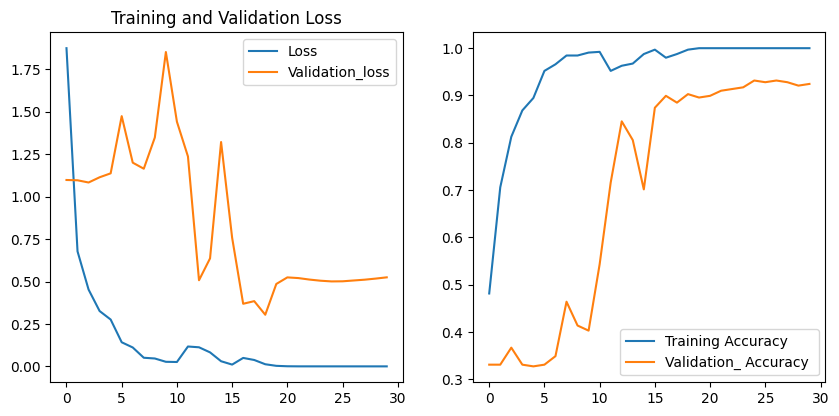

In [ ]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

15/15 [==============================] - 1s 71ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.89      0.89       149
           1       0.94      0.94      0.94       153
           2       0.86      0.87      0.86       154

    accuracy                           0.90       456
   macro avg       0.90      0.90      0.90       456
weighted avg       0.90      0.90      0.90       456



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,132,2,15
normal,2,144,7
virus,12,8,134


In [ ]:
base_model = tf.keras.applications.MobileNet(input_shape=[224,224,3], weights = "imagenet", include_top=False)

for layer in base_model.layers:
  layer.trainable =False

In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)

#Full Connected Layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.2)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.4)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)


pred_layer = tf.keras.layers.Dense(3, activation='sigmoid')(x)

In [ ]:
from tensorflow.keras import Model

model = Model( inputs = base_model.input, outputs = pred_layer)
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

In [ ]:
model.fit(X_train, y_train, validation_split=0.3, epochs=30, batch_size=32)

Epoch 1/30
21/21 [==============================] - 7s 167ms/step - loss: 1.9071 - accuracy: 0.6533 - val_loss: 0.2633 - val_accuracy: 0.8993
Epoch 2/30
21/21 [==============================] - 1s 61ms/step - loss: 0.4873 - accuracy: 0.8870 - val_loss: 0.2542 - val_accuracy: 0.9388
Epoch 3/30
21/21 [==============================] - 1s 58ms/step - loss: 0.1600 - accuracy: 0.9505 - val_loss: 0.1830 - val_accuracy: 0.9532
Epoch 4/30
21/21 [==============================] - 1s 61ms/step - loss: 0.1127 - accuracy: 0.9659 - val_loss: 0.2497 - val_accuracy: 0.9496
Epoch 5/30
21/21 [==============================] - 1s 58ms/step - loss: 0.0847 - accuracy: 0.9690 - val_loss: 0.2225 - val_accuracy: 0.9604
Epoch 6/30
21/21 [==============================] - 2s 73ms/step - loss: 0.0561 - accuracy: 0.9752 - val_loss: 0.2563 - val_accuracy: 0.9532
Epoch 7/30
21/21 [==============================] - 2s 74ms/step - loss: 0.0739 - accuracy: 0.9752 - val_loss: 0.2941 - val_accuracy: 0.9137
Epoch 8/30
2

Text(0.5, 1.0, 'Training-Validation Accuracy')

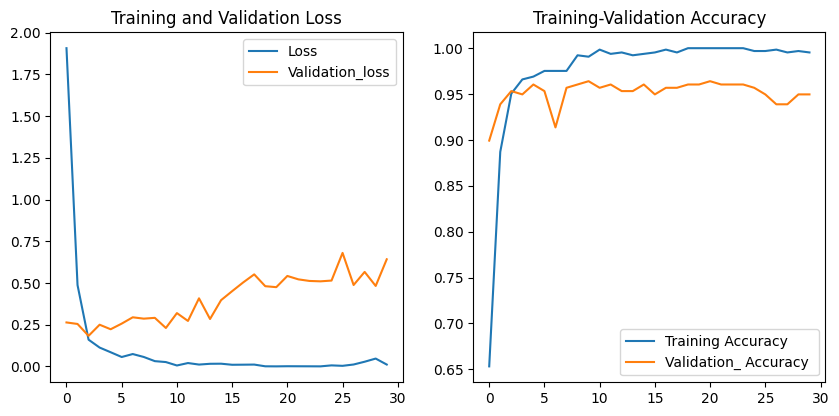

In [ ]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

In [ ]:
predictions = model.predict(X_test)

y_pred = np.argmax(predictions, axis = 1)
y_test_new = np.argmax(y_test, axis = 1)

15/15 [==============================] - 2s 66ms/step


In [ ]:
print(classification_report(y_test_new, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       149
           1       0.99      0.99      0.99       153
           2       0.88      0.97      0.92       154

    accuracy                           0.94       456
   macro avg       0.94      0.94      0.94       456
weighted avg       0.94      0.94      0.94       456



In [ ]:
pd.DataFrame(confusion_matrix(y_test_new, y_pred), columns= ["covid", "normal", "virus"], index = ["covid", "normal", "virus"])

,covid,normal,virus
covid,128,2,19
normal,0,151,2
virus,5,0,149


In [ ]:
import pickle

In [ ]:
filename = 'resnet50_tained.sav'
pickle.dump(model,open(filename,'wb'))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
files.download('resnet50_tained.sav')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
base_model = tf.keras.applications.vgg16.VGG16(include_top = False, weights='imagenet',input_shape=[224,224,3])

for layers in base_model.layers:
  layers.trainable = False

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
x = tf.keras.layers.Flatten()(base_model.output)

#Full Connected Layers
x = tf.keras.layers.Dense(512, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
#Add dropout to avoid Overfit
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)

pred = tf.keras.layers.Dense(3,activation='sigmoid')(x)

In [ ]:
from tensorflow.keras import Model

model = Model( inputs = base_model.input, outputs = pred)
model.compile(optimizer='adam', loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,validation_split=0.3,epochs=20,batch_size = 32)

Epoch 1/20
21/21 [==============================] - 16s 466ms/step - loss: 0.8512 - accuracy: 0.3824 - val_loss: 0.4857 - val_accuracy: 0.8058
Epoch 2/20
21/21 [==============================] - 4s 190ms/step - loss: 0.5326 - accuracy: 0.6022 - val_loss: 0.2619 - val_accuracy: 0.8921
Epoch 3/20
21/21 [==============================] - 4s 190ms/step - loss: 0.3987 - accuracy: 0.7353 - val_loss: 0.2142 - val_accuracy: 0.9101
Epoch 4/20
21/21 [==============================] - 4s 194ms/step - loss: 0.2539 - accuracy: 0.8576 - val_loss: 0.1348 - val_accuracy: 0.9353
Epoch 5/20
21/21 [==============================] - 4s 184ms/step - loss: 0.1713 - accuracy: 0.9133 - val_loss: 0.1505 - val_accuracy: 0.9460
Epoch 6/20
21/21 [==============================] - 4s 185ms/step - loss: 0.1503 - accuracy: 0.9211 - val_loss: 0.1087 - val_accuracy: 0.9460
Epoch 7/20
21/21 [==============================] - 4s 196ms/step - loss: 0.0992 - accuracy: 0.9505 - val_loss: 0.1219 - val_accuracy: 0.9137
Epoch